# Connecticut Dickey-Fuller Tests & Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
topzip = pd.read_csv('topzip_timeseries.csv')
topzip.head()

,time,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,AveragePrice,ROI,value
0,1996-04-01,60545,7030,Hoboken,NJ,New York,Hudson,58,957777.358491,5.148210,301600.0
1,1996-04-01,62022,11211,New York,NY,New York,Kings,118,595167.169811,11.189940,133200.0
2,1996-04-01,60639,7302,Jersey City,NJ,New York,Hudson,192,596591.320755,9.403061,137200.0
3,1996-04-01,62027,11216,New York,NY,New York,Kings,476,572171.698113,9.942505,146100.0
4,1996-04-01,62033,11222,New York,NY,New York,Kings,1156,640047.547170,10.535523,149200.0


In [3]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [4]:
topzip.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AveragePrice', 'ROI'], inplace=True)

In [6]:
topzip.Zipcode.value_counts()

7756     265
7302     265
11222    265
11216    265
7030     265
6820     265
6068     265
11211    265
6793     265
Name: Zipcode, dtype: int64

In [7]:
state_zips = [7756, 7302, 7030]

state = topzip[topzip['Zipcode'].isin(state_zips)]
state.head()

,Zipcode,value
time,,
1996-04-01,7030,301600.0
1996-04-01,7302,137200.0
1996-04-01,7756,98500.0
1996-05-01,7030,302700.0
1996-05-01,7302,137800.0


### First Zipcode: 7756

In [8]:
first_zip = state[state['Zipcode'] == state_zips[0]]
first_zip.drop(columns=['Zipcode'], inplace=True)
first_zip.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
time,
1996-04-01,98500.0
1996-05-01,99100.0
1996-06-01,99600.0
1996-07-01,100300.0
1996-08-01,100900.0


In [9]:
roll_mean = first_zip.rolling(window=12, center=False).mean()
roll_std = first_zip.rolling(window=12, center=False).std()

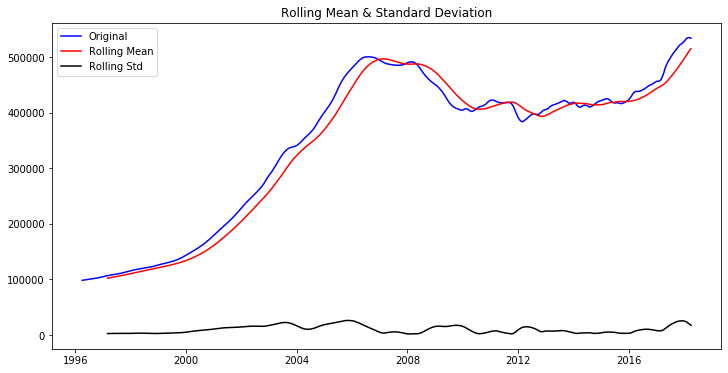

In [10]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(first_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.49728032696387686
Fail to reject the null hypothesis. Data is not stationary.



In [12]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.572721
p-value                          0.497280
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [13]:
one_diff_first = first_zip.diff().dropna()

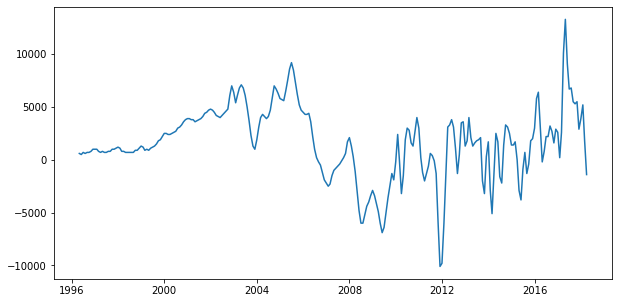

In [14]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_first);

In [15]:
dftest = adfuller(one_diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.23689492050748423
Fail to reject the null hypothesis. Data is not stationary.



In [16]:
two_diff_first = one_diff_first.diff().dropna()

In [17]:
dftest = adfuller(two_diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 1.5397140271612165e-05
Reject the null hypothesis. Data is stationary.



In [18]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -5.079716
p-value                          0.000015
#Lags Used                      15.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


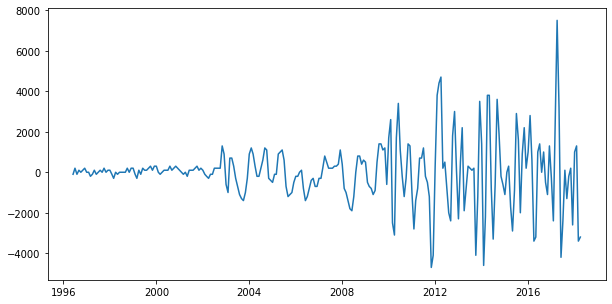

In [19]:
plt.figure(figsize=(10,5))
plt.plot(two_diff_first);

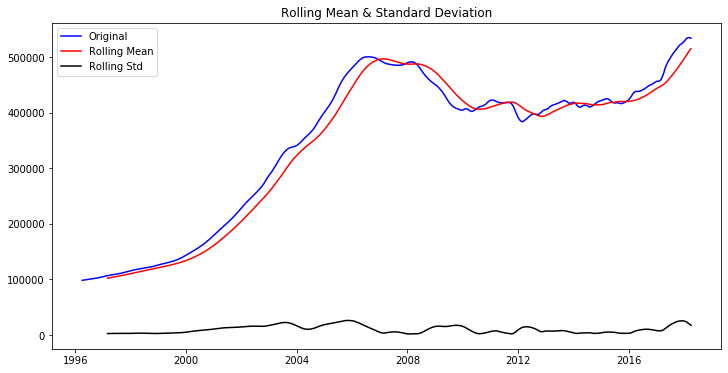

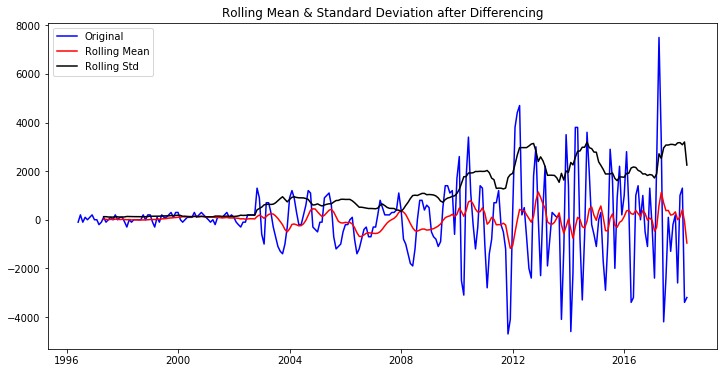

In [20]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_first.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_first.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_first, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

### Second Zipcode: 7302

In [21]:
second_zip = state[state['Zipcode'] == state_zips[1]]
second_zip.drop(columns=['Zipcode'], inplace=True)
second_zip.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
time,
1996-04-01,137200.0
1996-05-01,137800.0
1996-06-01,138500.0
1996-07-01,139100.0
1996-08-01,139600.0


In [22]:
roll_mean = second_zip.rolling(window=12, center=False).mean()
roll_std = second_zip.rolling(window=12, center=False).std()

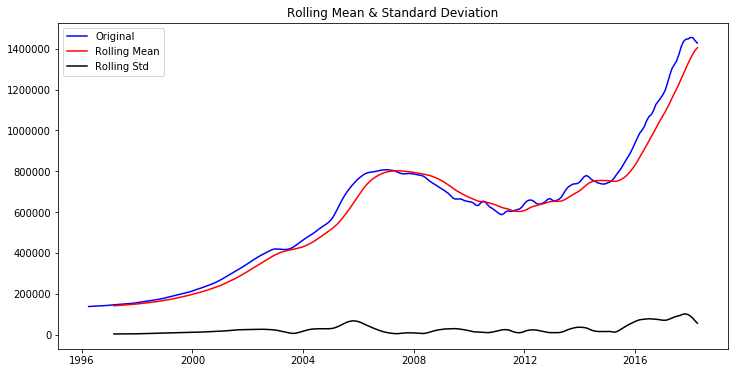

In [23]:
fig = plt.figure(figsize=(12,6))
plt.plot(second_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.8818951286500807
Fail to reject the null hypothesis. Data is not stationary.



In [25]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -0.549950
p-value                          0.881895
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [26]:
one_diff_second = second_zip.diff().dropna()

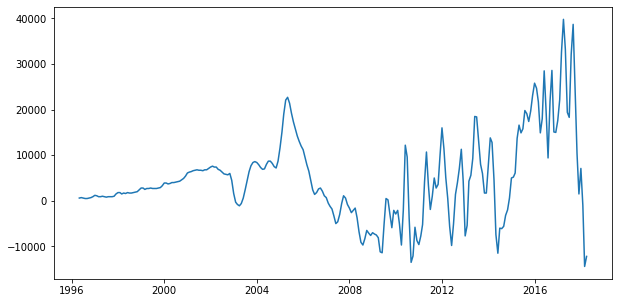

In [27]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_second);

In [28]:
dftest = adfuller(one_diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.3876702496849516
Fail to reject the null hypothesis. Data is not stationary.



In [29]:
two_diff_second = one_diff_second.diff().dropna()

In [30]:
dftest = adfuller(two_diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 9.523278317428136e-07
Reject the null hypothesis. Data is stationary.



In [31]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.657981e+00
p-value                        9.523278e-07
#Lags Used                     1.500000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


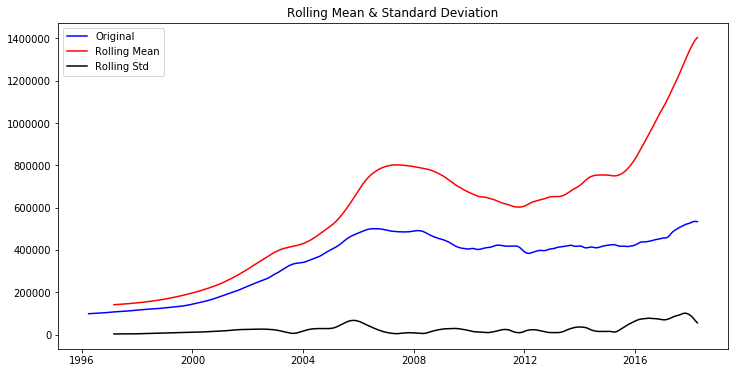

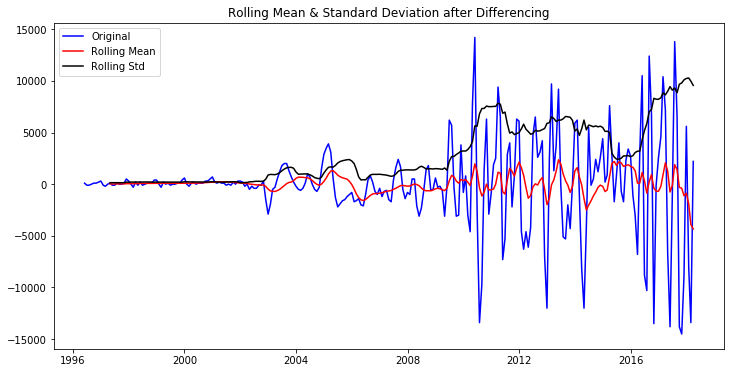

In [32]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_second.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_second, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

### Third Zipcode: 7030

In [33]:
third_zip = state[state['Zipcode'] == state_zips[2]]
third_zip.drop(columns=['Zipcode'], inplace=True)
third_zip.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
time,
1996-04-01,301600.0
1996-05-01,302700.0
1996-06-01,303800.0
1996-07-01,304800.0
1996-08-01,305800.0


In [34]:
roll_mean = third_zip.rolling(window=12, center=False).mean()
roll_std = third_zip.rolling(window=12, center=False).std()

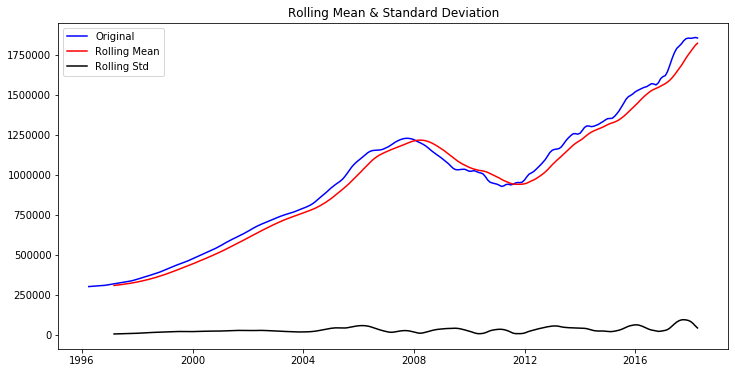

In [35]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(third_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.8913263672522387
Fail to reject the null hypothesis. Data is not stationary.



In [37]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -0.503527
p-value                          0.891326
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [38]:
one_diff_third = third_zip.diff().dropna()

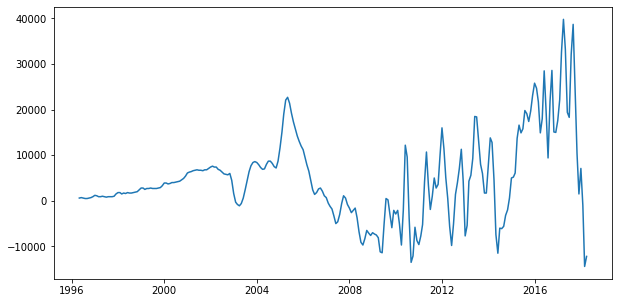

In [39]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_second);

In [40]:
dftest = adfuller(one_diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.3831419551563474
Fail to reject the null hypothesis. Data is not stationary.



In [41]:
two_diff_third = one_diff_third.diff().dropna()

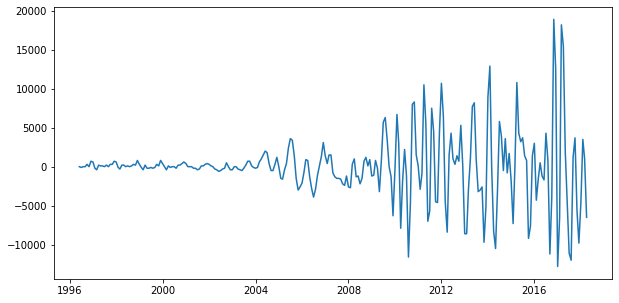

In [42]:
plt.figure(figsize=(10,5))
plt.plot(two_diff_third);

In [43]:
dftest = adfuller(two_diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 7.909779114598399e-07
Reject the null hypothesis. Data is stationary.



In [44]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.695039e+00
p-value                        7.909779e-07
#Lags Used                     1.500000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


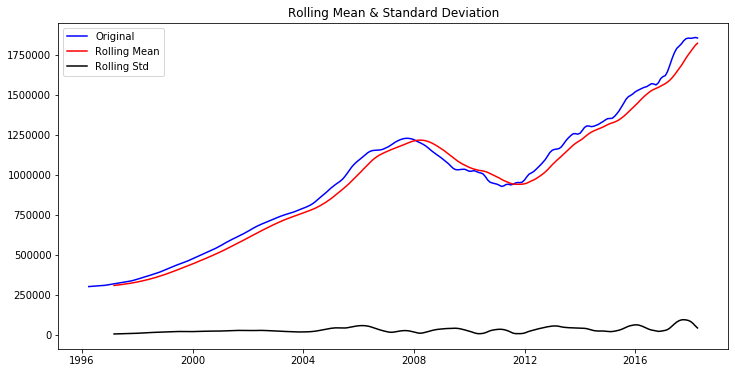

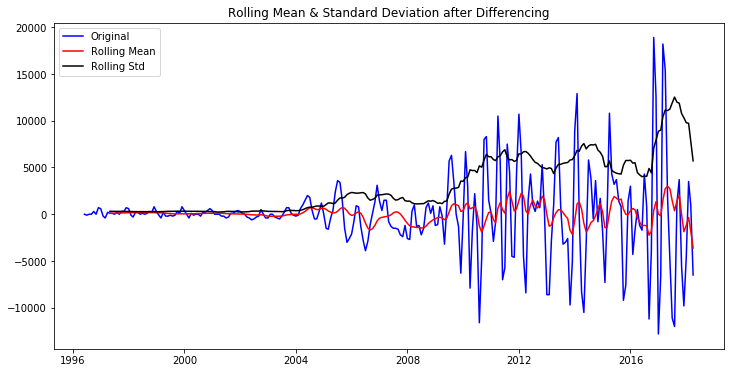

In [45]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_third.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_third.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_third, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()